In [1]:
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mpdates
import numpy as np
import pandas as pd
import os
import pytz
import warnings
import sys
sys.path.append('D:/Springboard_DataSci/Assignments/Lib')
import TimeTracker

In [2]:
'''Data collection'''
stopwatch = TimeTracker.TimeTracker()
# Get all the data.
path = r'D:\Springboard_DataSci\Assignments\Capstone_2--Airport_weather\data'
os.chdir(path)
print('Importing airline codes')
airline_codes = pd.read_csv('L_UNIQUE_CARRIERS.csv-1.csv', index_col='Code')
airline_codes = pd.Series(airline_codes.Description)
print('Importing flight status files\n')
flightFileNames = glob.glob('??_????_T_ONTIME_REPORTING.csv')
monthly_flights = []
for flightFile in flightFileNames:
    print('Appending flights from ' + flightFile[:2] + '/' + flightFile[3:7])
    monthly_flights.append(pd.read_csv(flightFile))
print('\nConcatenating the flight data')
flights = pd.concat(monthly_flights, ignore_index=True)

Importing airline codes
Importing flight status files

Appending flights from 01/2019
Appending flights from 02/2019
Appending flights from 03/2019
Appending flights from 04/2019
Appending flights from 05/2019
Appending flights from 06/2019
Appending flights from 07/2019
Appending flights from 08/2019
Appending flights from 09/2019
Appending flights from 10/2019
Appending flights from 11/2019
Appending flights from 12/2019

Concatenating the flight data


In [3]:
# Check the data. Verify that departure and arrival times are local using some sample flights.
for i, flights_that_month in enumerate(monthly_flights):
    first_flight = flights_that_month.iloc[0]
    if first_flight.YEAR==2019 and first_flight.MONTH==1:
        break
PHX_ATL_SW = monthly_flights[i][(monthly_flights[i].OP_UNIQUE_CARRIER=='WN') & #Southwest
                        (monthly_flights[i].ORIGIN=='PHX') &
                        (monthly_flights[i].DEST=='ATL')&
                        (monthly_flights[i].DAY_OF_MONTH==22)]
ATL_PHX_SW = monthly_flights[i][(monthly_flights[i].OP_UNIQUE_CARRIER=='WN') &
                        (monthly_flights[i].ORIGIN=='ATL') &
                        (monthly_flights[i].DEST=='PHX')&
                        (monthly_flights[i].DAY_OF_MONTH==29)]

for i, flights_that_month in enumerate(monthly_flights):
    first_flight = flights_that_month.iloc[0]
    if first_flight.YEAR==2019 and first_flight.MONTH==5:
        break
ATL_SLC_DL = monthly_flights[i][(monthly_flights[i].OP_UNIQUE_CARRIER=='DL') & #Delta
                        (monthly_flights[i].ORIGIN=='ATL') &
                        (monthly_flights[i].DEST=='SLC') &
                        (monthly_flights[i].DAY_OF_MONTH==18)]
SLC_ATL_DL = monthly_flights[i][(monthly_flights[i].OP_UNIQUE_CARRIER=='DL') &
                        (monthly_flights[i].ORIGIN=='SLC') &
                        (monthly_flights[i].DEST=='ATL') &
                        (monthly_flights[i].DAY_OF_MONTH==23)]
cols_to_print = ['OP_CARRIER_FL_NUM','ORIGIN','DEST','CRS_DEP_TIME','CRS_ARR_TIME']
print(PHX_ATL_SW[cols_to_print])
print(ATL_PHX_SW[cols_to_print])
print(ATL_SLC_DL[cols_to_print])
print(SLC_ATL_DL[cols_to_print])
# Conclusion: Both departure and arrival times are local.

        OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  CRS_ARR_TIME
500272                491    PHX  ATL           605          1135
500273                988    PHX  ATL          1630          2205
       OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  CRS_ARR_TIME
71962                680    ATL  PHX          1900          2120
71963               3407    ATL  PHX          1050          1320
        OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  CRS_ARR_TIME
337967               1105    ATL  SLC           821          1022
338200               1333    ATL  SLC          1930          2132
338367               1507    ATL  SLC          1225          1421
338890               2076    ATL  SLC          1659          1859
339027               2239    ATL  SLC          2146          2347
339057               2286    ATL  SLC          1350          1550
339072               2302    ATL  SLC          1051          1248
       OP_CARRIER_FL_NUM ORIGIN DEST  CRS_DEP_TIME  CRS_ARR_TIME
8291          

In [4]:
# Get the busiest airports in the US.'
busiest_US_airports2018 = pd.read_csv('busiest_US_airports2018.csv', index_col='Rank')
print(busiest_US_airports2018) #We will later add a column, so keep it as a DF.

'''Explore the flight data.'''
# Drop all monthly_flights that don't start or end at our airports of interest.
print('\n"flights" df shape before trim:', flights.shape)
flights.drop(flights.index[
    np.where(~np.any([flights.ORIGIN.isin(busiest_US_airports2018['Airport']),
                      flights.DEST.isin(busiest_US_airports2018['Airport'])], axis=0))[0]], inplace=True)
print('"flights" df shape after trim:', flights.shape)
print(flights.columns)
del(monthly_flights, PHX_ATL_SW, ATL_PHX_SW, ATL_SLC_DL, SLC_ATL_DL) #no longer needed

# Clean the dataframe.
flights.drop(['OP_CARRIER_FL_NUM', 'ORIGIN_CITY_NAME',
              'DEST_CITY_NAME', 'Unnamed: 23'], axis=1, inplace=True)
print("Existing NaNs:\n" + str(flights.isna().sum()))

     Airport
Rank        
1        ATL
2        LAX
3        ORD
4        DFW
5        DEN
6        JFK
7        SFO
8        SEA
9        LAS
10       MCO
11       EWR
12       CLT
13       PHX
14       MIA
15       IAH
16       BOS

"flights" df shape before trim: (7422037, 24)
"flights" df shape after trim: (5368926, 24)
Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'DEST', 'DEST_CITY_NAME', 'CRS_DEP_TIME', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'CRS_ARR_TIME', 'ARR_DELAY_NEW', 'ARR_DEL15', 'CANCELLED',
       'CANCELLATION_CODE', 'DIVERTED', 'WEATHER_DELAY', 'DIV_REACHED_DEST',
       'DIV_ARR_DELAY', 'Unnamed: 23'],
      dtype='object')
Existing NaNs:
YEAR                       0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
FL_DATE                    0
OP_UNIQUE_CARRIER          0
ORIGIN                     0
DEST                       

In [5]:
# DEP_DELAY_NEW and DEP_DEL15, and ARR_DELAY_NEW and ARR_DEL15, have matching
# NaN counts. Let's investigate this. XOR and EQUIV are defined.
XOR = lambda a, b: (a & ~b) | (~a & b)
EQUIV = lambda a, b: (a & b) | ~(a | b)
departureClashes = XOR(flights.DEP_DELAY_NEW.isna(), flights.DEP_DEL15.isna())
print("Clashes between DEP_DELAY_NEW and DEP_DEL15 NaN's:", departureClashes[departureClashes].count())
arrivalClashes = XOR(flights.ARR_DELAY_NEW.isna(), flights.ARR_DEL15.isna())
print("Clashes between ARR_DELAY_NEW and ARR_DEL15 NaN's:", arrivalClashes[arrivalClashes].count())

# No clashes. Impute missing values as 0.
flights.DEP_DELAY_NEW.fillna(value=0, inplace=True)
flights.ARR_DELAY_NEW.fillna(value=0, inplace=True)
flights.DEP_DEL15.fillna(value=0, inplace=True)
flights.ARR_DEL15.fillna(value=0, inplace=True)

Clashes between DEP_DELAY_NEW and DEP_DEL15 NaN's: 0
Clashes between ARR_DELAY_NEW and ARR_DEL15 NaN's: 0


In [6]:
# Investigate cancellations.
cancellationClashes = XOR(flights.CANCELLED == 0, flights.CANCELLATION_CODE.isna())
print("Clashes between CANCELLED and CANCELLATION_CODE NaN's:",
      cancellationClashes[cancellationClashes].count()) #Again, none.
flights.CANCELLATION_CODE.fillna(value=0, inplace=True)
print('Unique values of flights.CANCELLATION_CODE:\n' + str(flights.CANCELLATION_CODE.value_counts()))
flights['WeatherCancelled'] = (flights.CANCELLATION_CODE == 'B').astype(int)
flights.drop(['CANCELLED','CANCELLATION_CODE'], axis=1, inplace=True)

Clashes between CANCELLED and CANCELLATION_CODE NaN's: 0
Unique values of flights.CANCELLATION_CODE:
0    5270034
B      54279
A      25805
C      18793
D         15
Name: CANCELLATION_CODE, dtype: int64


In [7]:
# Investigate weather delays.
weatherDelayClashes = EQUIV(flights.WEATHER_DELAY.isna(), flights.ARR_DEL15==1)
print("Clashes between flights.WEATHER_DELAY NaN's and ARR_DEL15:",
      weatherDelayClashes[weatherDelayClashes].count()) #None.
flights.WEATHER_DELAY.fillna(value=0, inplace=True)
flights['WeatherDelayed'] = (flights.WEATHER_DELAY >= 15).astype(int)
flights.drop(['DEP_DELAY_NEW','ARR_DELAY_NEW'], axis=1, inplace=True)

Clashes between flights.WEATHER_DELAY NaN's and ARR_DEL15: 0


In [8]:
# Investigate diversions.
print('DIVERTED codes:\n' + str(flights.DIVERTED.value_counts()))
print('DIV_REACHED_DEST codes:\n' + str(flights.DIV_REACHED_DEST.value_counts()))
print('Count of DIV_REACHED_DEST:', flights.DIV_REACHED_DEST.count()) #Same as DIVERTED==1.
div_reached = flights[(flights.DIVERTED==1) & (flights.DIV_REACHED_DEST==1)]
print('WeatherDelayed and WeatherCancelled codes of flights who made their destination:')
print(div_reached.WeatherDelayed.value_counts()) #None
print(div_reached.WeatherCancelled.value_counts()) #None
div_failed = flights[(flights.DIVERTED==1) & (flights.DIV_REACHED_DEST==0)]
print('WeatherDelayed and WeatherCancelled codes of flights who didn\'t:')
print(div_failed.WeatherDelayed.value_counts()) #None
print(div_failed.WeatherCancelled.value_counts()) #None
# Conclusion: No flights were diverted due to weather.
flights.drop(['DIVERTED','DIV_REACHED_DEST','DIV_ARR_DELAY'], axis=1, inplace=True)

DIVERTED codes:
0.0    5354844
1.0      14082
Name: DIVERTED, dtype: int64
DIV_REACHED_DEST codes:
1.0    12299
0.0     1783
Name: DIV_REACHED_DEST, dtype: int64
Count of DIV_REACHED_DEST: 14082
WeatherDelayed and WeatherCancelled codes of flights who made their destination:
0    12299
Name: WeatherDelayed, dtype: int64
0    12299
Name: WeatherCancelled, dtype: int64
WeatherDelayed and WeatherCancelled codes of flights who didn't:
0    1783
Name: WeatherDelayed, dtype: int64
0    1783
Name: WeatherCancelled, dtype: int64


In [9]:
# Delete some temporary variables.
del(arrivalClashes, cancellationClashes, departureClashes, weatherDelayClashes,
    div_reached, div_failed, i)

In [10]:
'''Issues at either the departure airport or the arrival airport can affect the
flight. To analyze them separately as best we can, we need to copy the dataframe
into two, one for each.'''
print('Copying the DataFrame')
departing_flights = flights.copy()
arriving_flights = flights.copy()
del(flights)

Copying the DataFrame


In [11]:
# Now we only need departing flights from and arriving flights to the busiest airports.
departing_flights.drop(departing_flights.index[np.where(
    ~departing_flights.ORIGIN.isin(busiest_US_airports2018['Airport']))[0]], inplace=True)
arriving_flights.drop(arriving_flights.index[np.where(
    ~arriving_flights.DEST.isin(busiest_US_airports2018['Airport']))[0]], inplace=True)

print('Setting datetime objects')
arriving_flights['HOUR'] = arriving_flights.CRS_DEP_TIME // 100
arriving_flights['MINUTE'] = arriving_flights.CRS_DEP_TIME % 100

Setting datetime objects


Looking for any flights that crossed midnight
124160


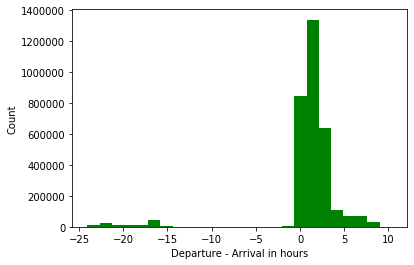

In [12]:
'''Flight dates are from departures. We need to see if any arrivals crossed midnight.'''
print('Looking for any flights that crossed midnight')
arriving_flights['ArrDepDiff'] = arriving_flights.CRS_ARR_TIME - arriving_flights.CRS_DEP_TIME
# Inspect any flights whose arrival time precedes its departure.
print(len(arriving_flights[arriving_flights.ArrDepDiff < 0].index)) #124160 flights. Need more trimming.

plt.hist(arriving_flights.ArrDepDiff/100, bins=25, color='g', align='left')
plt.xlabel('Departure - Arrival in hours')
plt.ylabel('Count')
plt.show() # A clear gap between -14 and -1. Possibly many "redeye" (overnight) flights.

In [13]:
print('Narrowing the list')
redEye_threshold = arriving_flights.ArrDepDiff < -1200
redEye_flights = arriving_flights[redEye_threshold]
print('Earliest departure time code in this list:',  min(redEye_flights.CRS_DEP_TIME))
print('Latest departure time code in this list:', max(redEye_flights.CRS_ARR_TIME))
# Even with time zone changes, that is more than four hours apart -- and very
# unlikely to be the same flight. But just in case let's look closer.

Narrowing the list
Earliest departure time code in this list: 1512
Latest departure time code in this list: 1107


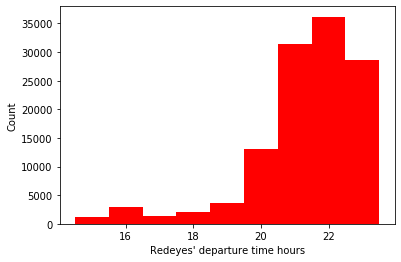

In [14]:
plt.hist(redEye_flights.CRS_DEP_TIME/100, range(15,25), color='r', align='left')
plt.xlabel("Redeyes' departure time hours")
plt.ylabel('Count')
plt.show()

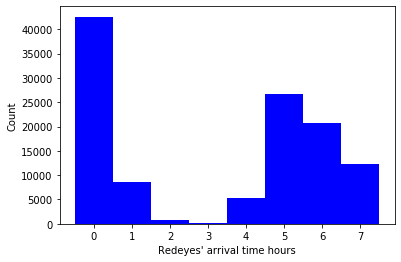

In [15]:
plt.hist(redEye_flights.CRS_ARR_TIME/100, bins=range(9), color='b', align='left')
plt.xlabel("Redeyes' arrival time hours")
plt.ylabel('Count')
plt.show()

In [16]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    redEye_flights.CRS_DEP_TIME -= 2400 #Now 1/100 hrs before midnight
    redEye_flights.drop('ArrDepDiff', axis=1, inplace=True)
    redEye_flights['ArrDepDiff'] = redEye_flights.CRS_ARR_TIME - redEye_flights.CRS_DEP_TIME

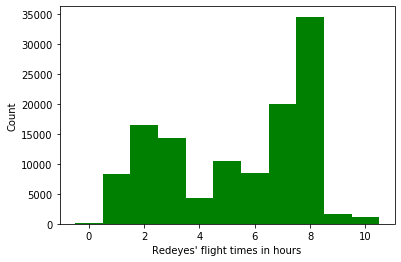

In [17]:
plt.hist((redEye_flights.CRS_ARR_TIME - redEye_flights.CRS_DEP_TIME)/100,
          bins = range(12), color='g', align='left')
plt.xlabel("Redeyes' flight times in hours")
plt.ylabel('Count')
plt.show()
arriving_flights['Redeye'] = redEye_threshold.astype(int)
# All redeyes will need their arrival dates increased by one.

In [18]:
# Get the timezones to make the times compatible in the upcoming merges.
def getTimeZone(df):
    timeZones = []
    for airport in df['Airport']:
        for zone, zoneAirports in timeZoneMap.items():
            if airport in zoneAirports:
                timeZones.append(zone)
                break
    return timeZones

In [19]:
timeZoneMap = {'US/Eastern':['ATL','JFK','MCO','EWR','CLT','MIA','BOS'],
               'US/Central':['ORD','DFW','IAH'],
               'US/Mountain':['DEN'],
               'US/Arizona':['PHX'],
               'US/Pacific':['LAS','LAX','SFO','SEA']}
busiest_US_airports2018['TimeZone'] = getTimeZone(busiest_US_airports2018)
busiest_US_airports2018 = busiest_US_airports2018.set_index('Airport')['TimeZone']
timeZoneMap = busiest_US_airports2018.map(pytz.timezone)
del(busiest_US_airports2018) #no longer needed

In [20]:
# The next part is SLOW, so let's do a time check.
print('Elapsed time prior to datetime calculations:', stopwatch.getElapsedTime())
datetimeCalcsStopwatch = TimeTracker.TimeTracker()

Elapsed time prior to datetime calculations: --- 35.28 seconds ---


In [21]:
with warnings.catch_warnings(): #This part is SLOW. Only run when ready.
    warnings.simplefilter('ignore')
    print('Calculating departure datetime numbers')
    departing_flights['Date'] = mpdates.num2date(
        mpdates.datestr2num(departing_flights.FL_DATE) + departing_flights.CRS_DEP_TIME//100/24
        + departing_flights.CRS_DEP_TIME%100/1440)
    print('Updating the departure datetimes')
    departing_flights['Date'] = departing_flights.apply(
        lambda row: row['Date'].replace(tzinfo=timeZoneMap[row['ORIGIN']]), axis=1)

    print('Calculating arrival datetime numbers including redeye data')
    arriving_flights['Date'] = mpdates.num2date(
        arriving_flights.Redeye + mpdates.datestr2num(arriving_flights.FL_DATE) + arriving_flights.CRS_ARR_TIME//100/24
        + arriving_flights.CRS_ARR_TIME%100/1440) #datestr2num() is the slow part
    print('Updating the arrival datetimes')
    arriving_flights['Date'] = arriving_flights.apply(
        lambda row: row['Date'].replace(tzinfo=timeZoneMap[row['DEST']]), axis=1)
print('Runtime of datetime calculations:', datetimeCalcsStopwatch.getElapsedTime())

Calculating departure datetime numbers
Updating the departure datetimes
Calculating arrival datetime numbers including redeye data
Updating the arrival datetimes
Runtime of datetime calculations: --- 20.0 minutes ---


In [22]:
# We no longer need the redeye info. Remove these and some temporary variables.
del(redEye_flights, redEye_threshold, cols_to_print, datetimeCalcsStopwatch)

In [23]:
# Remove columns that are no longer needed. We will not analyze over airlines or day of the week.
to_drop = ['YEAR','MONTH','DAY_OF_MONTH','DAY_OF_WEEK','FL_DATE',
            'CRS_ARR_TIME','CRS_DEP_TIME','OP_UNIQUE_CARRIER','WEATHER_DELAY']
with warnings.catch_warnings(): #This part is SLOW. Only run when ready.
    warnings.simplefilter('ignore')
    # By removing the destinations from departing flights, we can make these flights
    # a function of only one categorical variable: Arrival airports.
    departing_flights.drop(to_drop + ['DEST'], axis=1, inplace=True)
    # Similar for arrivals and decoupling airports of origin.
    arriving_flights.drop(to_drop + ['ORIGIN','HOUR','MINUTE','ArrDepDiff','Redeye'], axis=1, inplace=True)

In [24]:
'''Get daily summaries of all flights per airport.'''
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    arriving_flights['Flights'] = 1 #These variables used as counters
    departing_flights['Flights'] = 1
    # Incoming slow steps!
    print('Demoting datetimes to dates for departures')
    departing_flights['DepartureDate'] = departing_flights.apply(lambda row: row['Date'].date(), axis=1)
    print('Demoting datetimes to dates for arrivals')
    arriving_flights['ArrivalDate'] = arriving_flights.apply(lambda row: row['Date'].date(), axis=1)

Demoting datetimes to dates for departures
Demoting datetimes to dates for arrivals


In [25]:
# We no longer need the precise times, just the dates.
departing_flights.drop('Date', axis=1, inplace=True)
arriving_flights.drop('Date', axis=1, inplace=True)

# Form a pivot table based on the highest precip code in each column per day.
departing_flights = pd.pivot_table(data=departing_flights, index=['ORIGIN','DepartureDate'], aggfunc=np.sum)
arriving_flights = pd.pivot_table(data=arriving_flights, index=['DEST','ArrivalDate'], aggfunc=np.sum)

In [26]:
# Save the data and proceed to merging them.
# departing_flights.to_csv('departing_flights.csv') #Uncomment to create the file
# arriving_flights.to_csv('arriving_flights.csv') #Uncomment to create the file
print('Total runtime:', stopwatch.getElapsedTime())

Total runtime: --- 21.86 minutes ---
